In [1]:
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [2]:
raw_df = pd.read_csv("advertising.csv")

In [3]:
df = raw_df.copy()

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

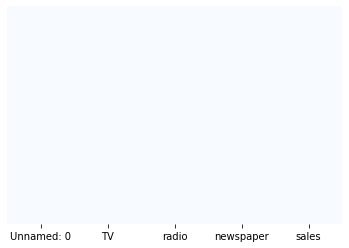

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values so we can proceed

In [11]:
df=df.drop('Unnamed: 0',axis=1)

here we drop unnecessary column.

In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

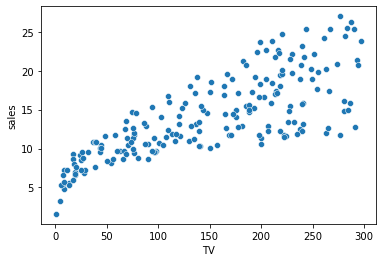

In [13]:
import seaborn as sns
sns.scatterplot(x="TV",y="sales",data=df)

We observe that TV and sales both increase simultaneously.

<AxesSubplot:xlabel='radio', ylabel='sales'>

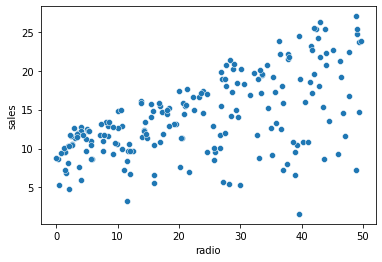

In [19]:
import seaborn as sns
sns.scatterplot(x="radio",y="sales",data=df)

The ratio of radio and sales are equally increasing. 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

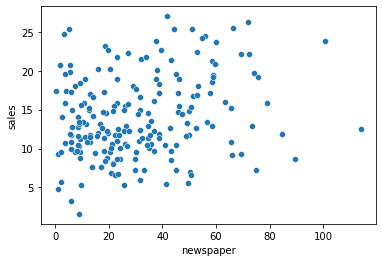

In [20]:
import seaborn as sns
sns.scatterplot(x="newspaper",y="sales",data=df)

The range of newspaper between 0 to 60 is having almost sales.

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is no need to remove skewness.

# OUTLIERS

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


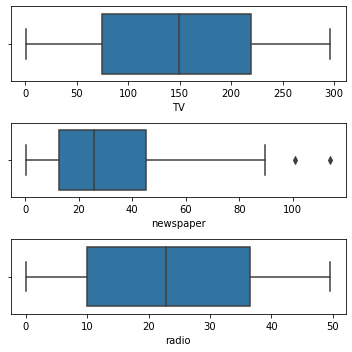

In [22]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


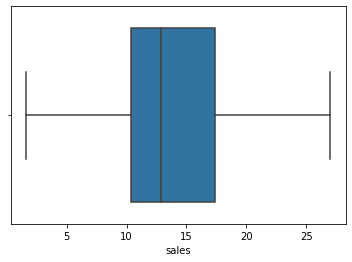

In [23]:
sns.boxplot(df['sales'])
plt.show()

No outliers are present. so we can proceed.

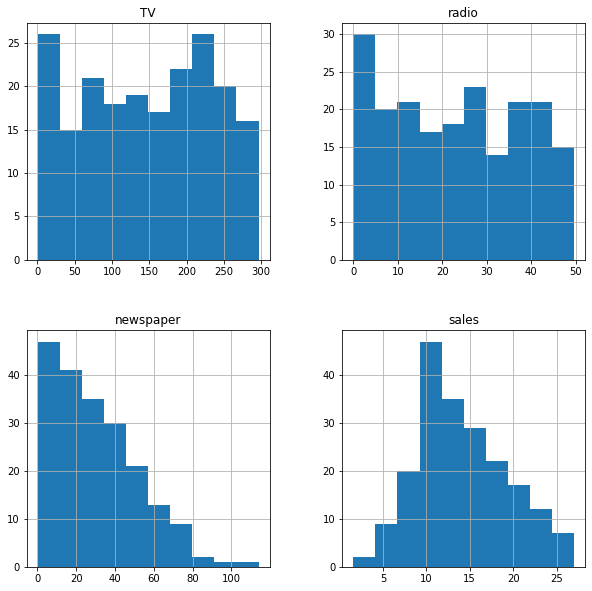

In [24]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

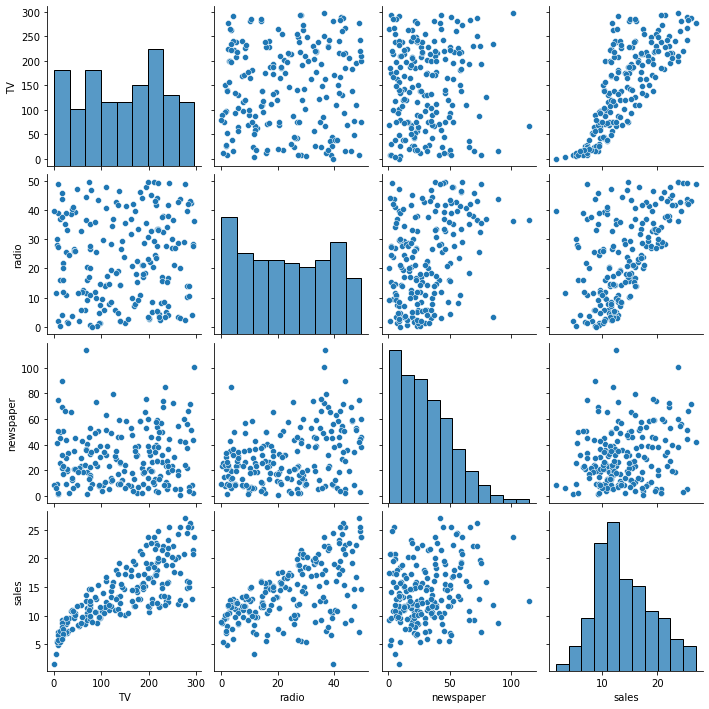

In [25]:
sns.pairplot(df, height=2.5)
plt.show()

# Correlation

<AxesSubplot:>

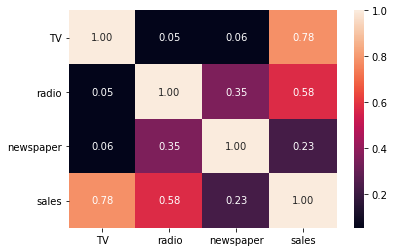

In [26]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

Sales column is highly correlated with TV and less correlated with newspaper.

# Scalling the data using Min-Max Scaler

In [27]:
### Define X&Y ###

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
x.shape

(200, 3)

In [29]:
y.shape

(200,)

In [30]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Traing and Testing the Model

In [31]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    

At random state 0,the training accuracy is:- 0.9067114990146383
At random state 0,the testing accuracy is:- 0.8601145185017869


At random state 1,the training accuracy is:- 0.8959372632325174
At random state 1,the testing accuracy is:- 0.8927605914615386


At random state 2,the training accuracy is:- 0.9151707412454462
At random state 2,the testing accuracy is:- 0.7575894500772722


At random state 3,the training accuracy is:- 0.8930288385772915
At random state 3,the testing accuracy is:- 0.9138375011080566


At random state 4,the training accuracy is:- 0.8911672911176578
At random state 4,the testing accuracy is:- 0.9085774752313167


At random state 5,the training accuracy is:- 0.8956962280033929
At random state 5,the testing accuracy is:- 0.8984204533332627


At random state 6,the training accuracy is:- 0.8915418760966582
At random state 6,the testing accuracy is:- 0.9224333473922028


At random state 7,the training accuracy is:- 0.8929164670647455
At random state 7,the testing acc

In [32]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.951970719510946 on random state 92


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)

In [34]:
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

Linear coefficients : [0.04575094 0.18557178 0.00103199]
Intercept : 2.816070998623159


In [36]:
pred_test=lr.predict(x_test)

In [37]:
print(r2_score(y_test,pred_test))

0.951970719510946


In [38]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Root Mean Squared Error: 1.2179671852402436


In [39]:
import statsmodels.api as sm

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        10:39:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Cross-Validation of the model:

In [40]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cv score is { cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is { test_accuracy}")
    print("\n")


at cross fold2 the cv score is 0.8908473589845056 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold3 the cv score is 0.8916464591145559 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold4 the cv score is 0.8900070660549506 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold5 the cv score is 0.8871063495438435 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold6 the cv score is 0.8899208882186672 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold7 the cv score is 0.8859930219823539 and accuracy score for training is -0.904814605916771 and accuracy for testing is 0.951970719510946


at cross fold8 the cv score is 0.8826686689919152 and accuracy score for training is -0.

<function matplotlib.pyplot.show(close=None, block=None)>

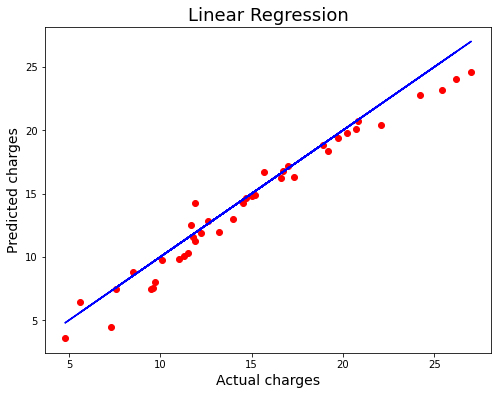

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show

# Regularization

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [44]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

87.89807661645716

In [45]:
lss=r2_score(y_test,pred_ls)
lss*100

95.14692161714389

In [46]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

88.82007416256036

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [48]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 98.4774351202872
Cross Val Score: 97.63079718162506


# Conclusion

In [49]:
import pickle
filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))

In [50]:
import pickle
loaded_model=pickle.load(open('advertising.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.4774351202872


In [51]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","original"])

In [52]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,10.131,13.082,9.655,19.478,12.795,16.082,9.641,12.275,9.568,7.432,...,15.152,11.741,17.191,12.068,5.433,19.887,14.521,25.017,12.114,15.417
original,10.131,13.082,9.655,19.478,12.795,16.082,9.641,12.275,9.568,7.432,...,15.152,11.741,17.191,12.068,5.433,19.887,14.521,25.017,12.114,15.417
